## Gravity (or magnetics) field separation

Very often local anomalies are overlain by a global field with long wavelengths.
Additionally, there is noise from the device's inaccuracy and local inhomogeneity.
Here we demonstrate these effects and a very simple approach how to deal with it.

In [1]:
# First we import numerics and plotting libraries
import numpy as np
import matplotlib.pyplot as plt
#plt.style.use("seaborn-notebook")
# %config InlineBackend.figure_format='svg' # Setting figure format for this notebook
# %matplotlib notebook

In [2]:
def gravitySphere(x, y, dS, xS=0, yS=0, R=1, rho=1000, z=0):
    """The gravity field of a sphere as a function of x and y.
    
    Parameters
    ----------
    x, y : iterable
        x and y positions of the instrument
    dS : float
        depth of the sphere
    xS, yS : float [0]
        x/y position of the sphere [0, 0]
    R : float
        radius of the sphere
    rho : float
        density (contrast)
    z : float
        measuring height
    """
    dx = np.array(x) - xS
    dy = np.array(y) - yS
    dz = z+dS
    G = 6.6742e-11
    V = 4 / 3 * np.pi * R**3
    r = np.sqrt(dx**2 + + dy**2 + dz**2)
    gz = dz * V * rho * G / r**3
    return gz * 1e5

In [3]:
# We define a measuring grid of 20x20m with a spacing of 0.5m
x = np.arange(-20, 20.1, 0.5)
y = np.arange(-10, 10.1, 0.5)
X, Y = np.meshgrid(x, y)
print(X.shape, Y.shape)
# plt.figure()
# plt.pcolormesh(Y)

(41, 81) (41, 81)


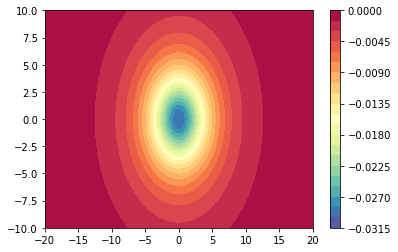

In [4]:
g = gravitySphere(X, Y, dS=5, R=3, rho=-1000)
# g = gravitySphere(X, Y, xS=-5, yS=2, dS=5, R=5, rho=-2000)
plt.figure()
#plt.pcolormesh(x, y, g, cmap="Spectral_r"); # contourf
plt.contourf(x, y, g, cmap="Spectral_r", levels=20); # contourf
plt.colorbar();

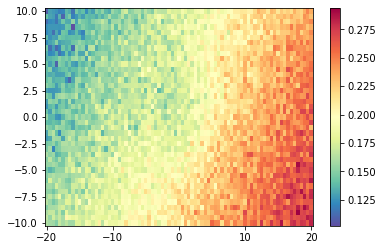

In [5]:
g2 = g + np.random.randn(*X.shape) * 0.01 + X*0.003 - Y * 0.002 + 0.2
plt.figure()
plt.pcolormesh(x, y, g2, cmap="Spectral_r");
plt.colorbar();

In [6]:
A = np.column_stack((X.flat, Y.flat, np.ones_like(X.ravel())))
abc, *_ = np.linalg.lstsq(A, g2.flat, 0.001)
print(abc)

[ 0.00297364 -0.00202113  0.19611046]


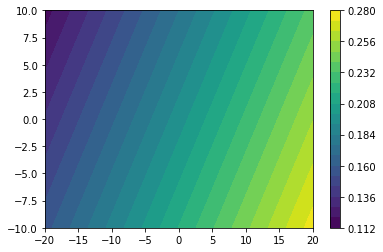

In [7]:
gGlobal = A.dot(abc).reshape(X.shape)
plt.figure()
plt.contourf(X, Y, gGlobal, levels=20);
plt.colorbar();

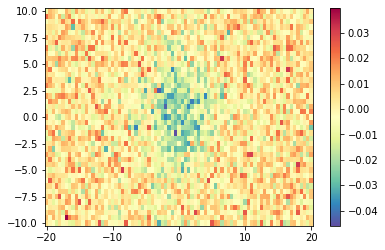

In [8]:
g3 = g2 - gGlobal
plt.figure()
plt.pcolormesh(X, Y, g3, cmap="Spectral_r");
plt.colorbar();

In [20]:
g4 = np.convolve(g2, np.array([[1, 1, 1], [1, 1, 1], [1, 1, 1]]))
g4.shape

ValueError: object too deep for desired array

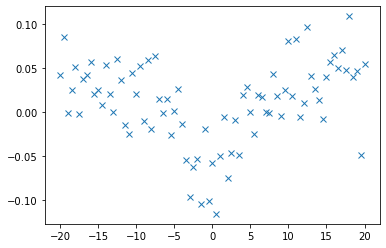

In [16]:
#fig, ax = plt.subplots()
#for gg in [g, g2, g3]:
plt.figure()
gMeasured = np.sum(g3[5:15, :], axis=0)
plt.plot(x, gMeasured, "x")  # g, g2, g3
#plt.grid();

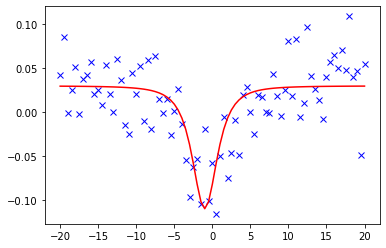

In [18]:
gModel = gravitySphere(x, x*0, xS=-1, dS=2.5, R=2.5, rho=-2000) + 0.03
plt.plot(x, gMeasured, "bx")
plt.plot(x, gModel, "r-")

Obviously we're running into negative values. How to get rid of?

1. Increase your measuring area and repeat all steps
2. Use a non-linear background field (e.g. sine) on $y$ and repeat.
3. Try to use filter techniques (in scipy, matplotlib image, pil) instead.